# Tools sandbox

In this notebook we showcase the `tools.py` library.

## pie()

Useful pie plot with matplotlib. It has the following parameters:

- values (mandatory): `list` or `pandas.Series()` of unique values. Using `value_counts()` is highly recommended.
- labels: if `None`, indices of `values` will be used. Default: None.
- title: header for the plot. Default: ''.
- slices: set a number of slices, to avoid clutter. Default: None.
- percent_only: if False it will show count and percent. Default: False.
- explode: slightly separate the slice with the highest value. Default: True.
- color: text color. Default: 'white'.

In [1]:
from tools import pie

In [3]:
import pandas as pd

In [4]:
ex = ['hi', 'hi', 'ho', 'ho', 'ho', 'he', 'he', 1]
ex = ['hi', 'hi', 'ho', 'ho', 'ho', 'he', 'he']
# ex = [2, 5, 6, 7, 2, 6, 4, 3, 6, 1, 7, 8, 3, 5, 6, 1, 6, 2, 4, 7, 2, 6, 2, 7, 7, 3, 6]

ex = pd.Series(ex).value_counts()  # works best with value counts

In [5]:
ex

ho    3
hi    2
he    2
dtype: int64

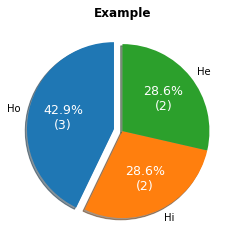

In [6]:
pie(ex, title='Example')

## corr_matrix()

Generates a correlation matrix with p values, just like SPSS. It takes the following parameters:

- data: pandas.DataFrame to calculate correlations
- significance: bool that determines whether to include asterisks to correlations. Default: False.
- decimals: int used to round values. Default: 3.

In [7]:
from tools import corr_matrix

In [9]:
# generate toy data

from random import randint
from scipy.stats import pearsonr
from scipy.optimize import minimize

n = 60

data = pd.DataFrame({'a': [randint(1, 42) for _ in range(n)]})

def fun_a(x):
    if np.std(x) >= n:
        return np.std(x)
    return abs(0.5 - pearsonr(data['a'], x)[0])

def fun_b(x):
    if np.std(x) >= n:
        return np.std(x)
    return abs(0.3 - pearsonr(data['b'], x)[0])


data['b'] = minimize(fun_a, [randint(1, 42) for _ in range(n)], 
                     method = 'SLSQP', bounds = [(1, 42) for _ in range(n)]).x

data['c'] = minimize(fun_b, [randint(1, 42) for _ in range(n)], 
                     method = 'SLSQP', bounds = [(1, 42) for _ in range(n)]).x

data['d'] = abs(minimize(lambda x: abs(0.3 - pearsonr(data['a'], x)[0]), 
                     np.random.uniform(1, 42, n)).x)

data = data.astype(np.int32)
data

,a,b,c,d
0,38,31,30,27
1,22,25,41,9
2,2,24,41,0
3,15,1,1,25
4,39,36,7,26
...,...,...,...,...
55,19,19,38,33
56,42,41,41,17
57,32,40,10,39
58,29,11,22,10


In [18]:
# make it harder with a missing value and a column with strings
data2 = data.copy()
data2['a'][4] = np.nan
# data2['b'][7] = '-'  # be careful, non-numerical columns won't show be compared
data2['e'] = ('a '*60).split()
data2

,a,b,c,d,e
0,38.0,31,30,27,a
1,22.0,25,41,9,a
2,2.0,24,41,0,a
3,15.0,1,1,25,a
4,NaN,36,7,26,a
...,...,...,...,...,...
55,19.0,19,38,33,a
56,42.0,41,41,17,a
57,32.0,40,10,39,a
58,29.0,11,22,10,a


In [21]:
corr_matrix(data2, significance=True, decimals=3)

a         b       c       d
a Pearson's r       1.0  0.489***   0.118  0.294*
  Sample size       NaN      59.0    59.0    59.0
  p value           1.0       0.0   0.374   0.024
b Pearson's r  0.489***       1.0  0.291*    0.22
  Sample size      59.0       NaN    60.0    60.0
  p value           0.0       1.0   0.024   0.091
c Pearson's r     0.118    0.291*     1.0  -0.202
  Sample size      59.0      60.0     NaN    60.0
  p value         0.374     0.024     1.0   0.122
d Pearson's r    0.294*      0.22  -0.202     1.0
  Sample size      59.0      60.0    60.0     NaN
  p value         0.024     0.091   0.122     1.0

### Heatplot?

This could eventually be another function.

<AxesSubplot:>

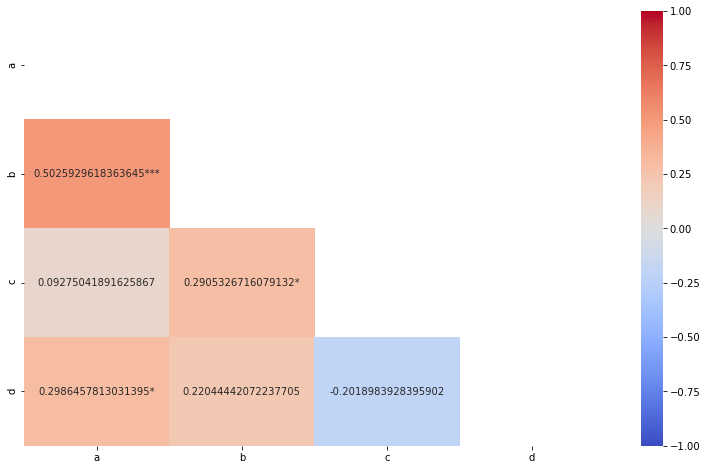

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

df_c = data.corr(method=lambda x, y: pearsonr(x,y)[0])
pval = data.corr(method=lambda x, y: pearsonr(x,y)[1])

p = pval.applymap(lambda x: ''.join(['*' for t in [0.001,0.01,0.05] if x<=t]))
#dfc_2 below will give you the dataframe with correlation coefficients and p values
df_c2 = df_c.astype(str) + p

#you could also plot the correlation matrix using sns.heatmap if you want
#plot the triangle
matrix = np.triu(df_c.corr())
#convert to array for the heatmap
df_c3 = df_c2.to_numpy()

#plot the heatmap
plt.figure(figsize=(13,8))
sns.heatmap(df_c, annot = df_c3, fmt='', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)